In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import rainbow
import numpy as np
from scipy.integrate import odeint
from scipy.io import loadmat
import pysindy as ps

In [21]:
#noise "np.sqrt(dt)*(c)*(np.random.randn())"
g = 9        #gravity aprrox
l = 3         #pendulum length
lam = 0.2   #decay 
c1 = 0.0    #noise_1
c2 = 0.1    #noise_2
c3 = 1.0    #noise_3
T = 25      #total Time duration in steps
x0 = 2     #initial condition of x at time 0
y0 = 0      #initial condition of y at time 0
dt =0.01    #timestep

# initiatialize variables
t = np.arange(0, T, dt)

x = np.zeros_like(t)
y = np.zeros_like(t)

a = np.zeros_like(t)
b = np.zeros_like(t)

w = np.zeros_like(t)
z = np.zeros_like(t)

x[0] = x0  #theta
y[0] = y0  #theta_dot

a[0] = x0  #theta
b[0] = y0  #theta_dot

w[0] = x0  #theta
z[0] = y0  #theta_dot

# Step through in time
for k in range(len(t)-1):
    x[k+1] = x[k]+dt*(-lam*x[k] + 3*y[k]) + np.sqrt(dt)*(c1)*(np.random.randn())
    y[k+1] = y[k]+dt*(-lam*y[k] + (-g/l)*x[k])
    #print(x[k],y[k])
    
data_1 = np.vstack((x, y)).T

In [7]:
#increased noise c2
for k in range(len(t)-1):
    a[k+1] = a[k]+dt*(-lam*a[k] + 3*b[k]) + np.sqrt(dt)*(c2)*(np.random.randn())
    b[k+1] = b[k]+dt*(-lam*b[k] + (-g/l)*a[k])
        
data_2 = np.vstack((a, b)).T

In [8]:
#increased noise c3

for k in range(len(t)-1):
    w[k+1] = w[k]+dt*(-lam*w[k] + 3*z[k]) + np.sqrt(dt)*(c3)*(np.random.randn())
    z[k+1] = z[k]+dt*(-lam*z[k] + (-g/l)*w[k])
    
data_3 = np.vstack((w, z)).T

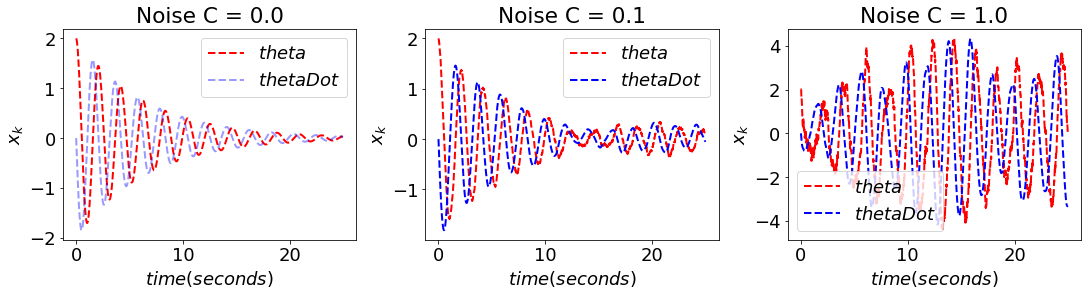

In [36]:
plot_kws = dict(linewidth=2)
fig, axs = plt.subplots(1, 3, constrained_layout=True,figsize=(15, 4))
axs[0].plot(t, data_1[:, 0], "r--", label="$theta$", **plot_kws)
axs[0].plot(t, data_1[:, 1], "b--", label="$theta Dot$", alpha=0.4, **plot_kws)
axs[0].set(xlabel="$time (seconds)$", ylabel="$x_k$")
axs[0].legend(loc="best")
axs[0].set_title("Noise C = " + str(c1))

axs[1].plot(t,data_2[:, 0], 'r--', label="$theta$", **plot_kws)
axs[1].plot(t,data_2[:, 1], 'b--', label="$theta Dot$",  **plot_kws)
axs[1].set(xlabel="$time (seconds)$", ylabel="$x_k$")
axs[1].legend(loc="best")
axs[1].set_title("Noise C = " + str(c2))

axs[2].plot(t,data_3[:, 0], 'r--', label="$theta$", **plot_kws)
axs[2].plot(t,data_3[:, 1], 'b--', label="$theta Dot$",  **plot_kws)
axs[2].set(xlabel="$time (seconds)$", ylabel="$x_k$")
axs[2].legend(loc="best")
axs[2].set_title("Noise C = " + str(c3))
fig.tight_layout
fig.show()

In [25]:
poly_order = 1
threshold = 0.5
#fd_drop_endpoints = ps.FiniteDifference(drop_endpoints=True)
smoothed_fd=ps.SmoothedFiniteDifference()

model1 = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order),
)
model2 = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order),
    differentiation_method=smoothed_fd,
)
model3 = ps.SINDy(
    optimizer=ps.STLSQ(threshold=threshold),
    feature_library=ps.PolynomialLibrary(degree=poly_order),
    differentiation_method=smoothed_fd,
)
model1.fit(data_1, t=dt)
model2.fit(data_2, t=dt)
model3.fit(data_3, t=dt)
print("c1")
model1.print()
print("\nc2")
model2.print()
print("\nc3")
model3.print()

c1
x0' = 3.013 x1
x1' = -2.997 x0

c2
x0' = 2.986 x1
x1' = -2.996 x0

c3
x0' = 3.179 x1
x1' = -2.986 x0


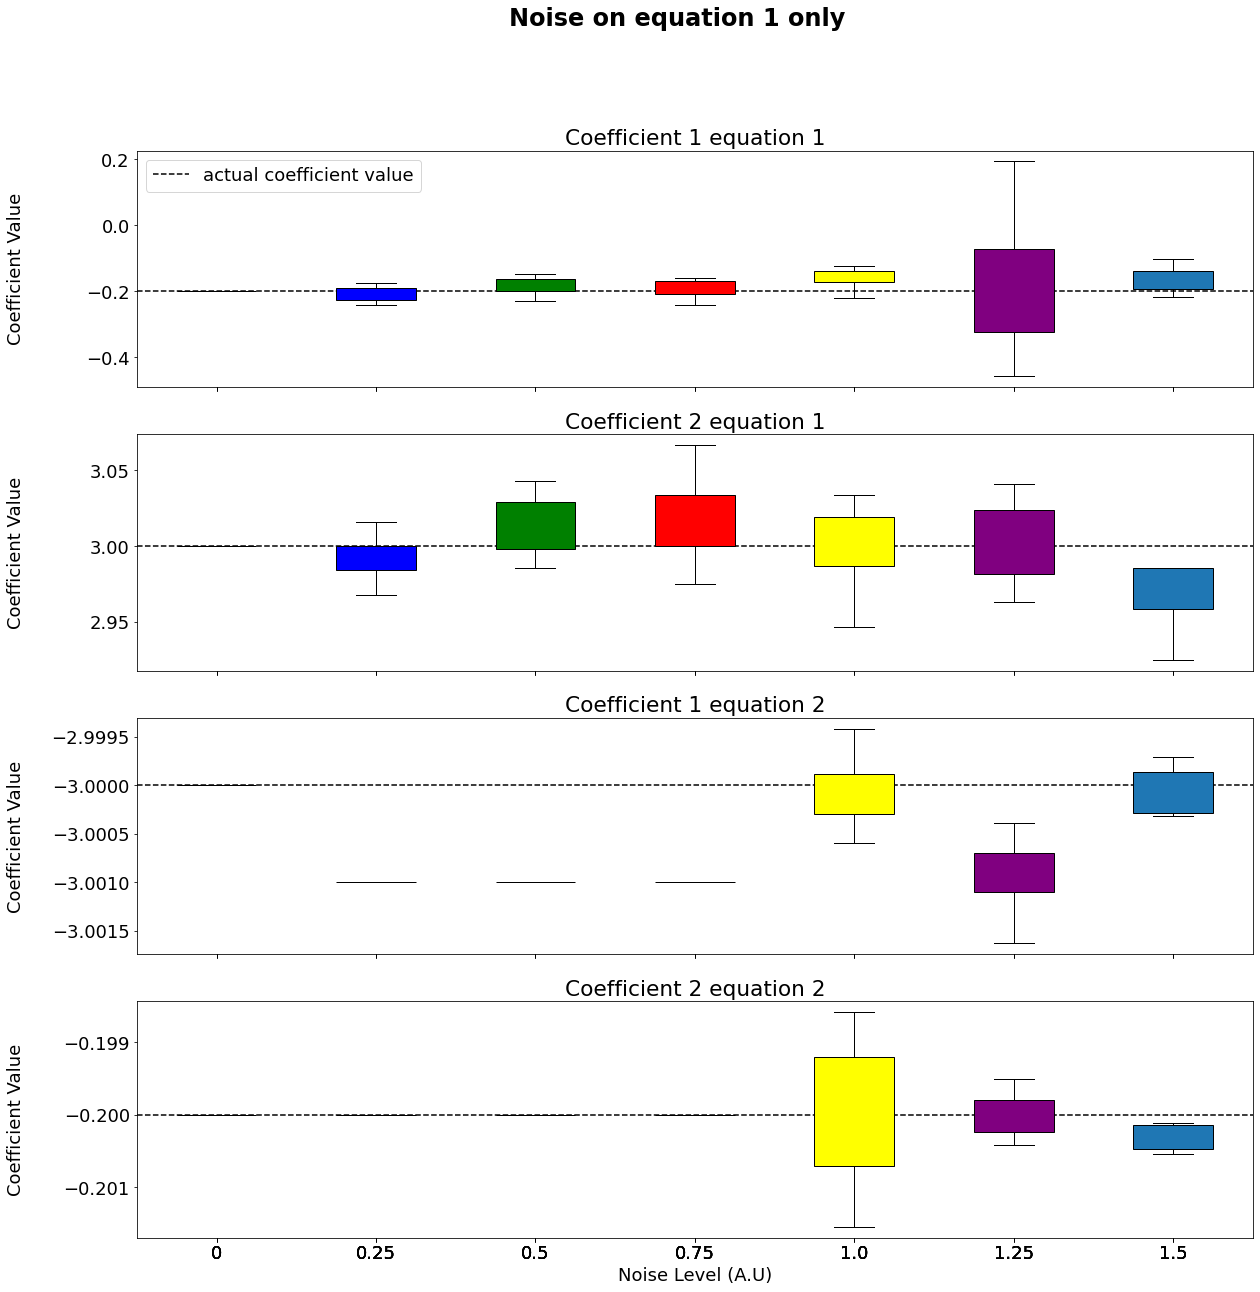

In [34]:
#coeff_1_eqn_1
eqn1_0 = np.random.normal(-0.2, 0.0, 10)
eqn1_n1 = np.random.normal(-.2053, 0.0211, 10)
eqn1_n2 = np.random.normal(-0.1868, 0.0219, 10)
eqn1_n3 = np.random.normal(-0.1924, 0.0274, 10)
eqn1_n4 = np.random.normal(-.1724, 0.0346, 10)
eqn1_n5 =np.random.normal(-0.1839, 0.232,10)
eqn1_n6 =np.random.normal(-.1779,0.0338,10)
coeff_1_eqn_1=[eqn1_0, eqn1_n1, eqn1_n2, eqn1_n3,eqn1_n4,eqn1_n5, eqn1_n6]

#coeff_2_eqn_1
eqn1a_0 = np.random.normal(3, 0.0, 10)
eqn1a_n1 = np.random.normal(2.9968, 0.0234, 10)
eqn1a_n2 = np.random.normal(2.997, 0.0232, 10)
eqn1a_n3 = np.random.normal(3.0063, 0.0268, 10)
eqn1a_n4 = np.random.normal(3.007, 0.0466, 10)
eqn1a_n5 =np.random.normal(3.0079,0.0383,10)
eqn1a_n6 =np.random.normal(2.9852,0.0323,10)
coeff_2_eqn_1=[eqn1a_0, eqn1a_n1, eqn1a_n2, eqn1a_n3,eqn1a_n4,eqn1a_n5, eqn1a_n6 ]

#coeff_1_eqn_2
eqn2_0 = np.random.normal(-3, 0.0, 10)
eqn2_n1 = np.random.normal(-3.001, 0.00, 10)
eqn2_n2 = np.random.normal(-3.001, 0.00, 10)
eqn2_n3 = np.random.normal(-3.001, 0.0, 10)
eqn2_n4 = np.random.normal(-3.0004, 0.0005, 10)
eqn2_n5 =np.random.normal(-3.0007,0.0005,10)
eqn2_n6 =np.random.normal(-3.0002,0.0004,10)
coeff_1_eqn_2=[eqn2_0 , eqn2_n1, eqn2_n2, eqn2_n3,eqn2_n4, eqn2_n5, eqn2_n6 ]

#coeff_2_eqn_2
eqn2a_0 = np.random.normal(-0.2, 0.0, 10)
eqn2a_n1= np.random.normal(-0.2, 0.0, 10)
eqn2a_n2= np.random.normal(-0.2, 0.0, 10)
eqn2a_n3 = np.random.normal(-0.2, 0.0, 10)
eqn2a_n4 = np.random.normal(-0.2, 0.0008, 10)
eqn2a_n5 = np.random.normal(-.2001, 0.0006, 10)
eqn2a_n6 =np.random.normal(-0.2002, 0.0004, 10)
coeff_2_eqn_2=[eqn2a_0 , eqn2a_n1, eqn2a_n2, eqn2a_n3, eqn2a_n4, eqn2a_n5, eqn2a_n6 ]

labels = ['0','0.25', '0.5', '0.75', '1.0','1.25','1.5']
medianprops = dict(linewidth=0)


fig, (ax1, ax2,ax3,ax4) = plt.subplots(nrows=4, ncols=1, figsize=(20, 20),  sharex=True)

# rectangular box plot
bplot1 = ax1.boxplot(coeff_1_eqn_1,0,'',
                     vert=True,  # vertical box alignment
                     medianprops=medianprops, #remove median
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax1.axhline(y=-0.2,linestyle="dashed", color="black", label="actual coefficient value")
ax1.set_title('Coefficient 1 equation 1')


bplot2 = ax2.boxplot(coeff_2_eqn_1,0,'',
                     vert=True,  # vertical box alignment
                     medianprops=medianprops,#remove median
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax2.axhline(y=3.0,linestyle="dashed", color="black")
ax2.set_title('Coefficient 2 equation 1')

bplot3 = ax3.boxplot(coeff_1_eqn_2,0,'',
                     vert=True,  # vertical box alignment
                     medianprops=medianprops,#remove median
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax3.axhline(y=-3.0,linestyle="dashed", color="black")
ax3.set_title('Coefficient 1 equation 2')

bplot4 = ax4.boxplot(coeff_2_eqn_2,0,'',
                     vert=True,  # vertical box alignment
                     medianprops=medianprops,#remove median
                     patch_artist=True,  # fill with color
                     labels=labels)  # will be used to label x-ticks
ax4.axhline(y=-0.2,linestyle="dashed", color="black")
ax4.set_title('Coefficient 2 equation 2')

# fill with colors
colors = ['pink', 'blue', 'green','red', 'yellow','purple']
for bplot in (bplot1, bplot2,bplot3,bplot4):
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

# adding horizontal grid lines
for ax in [ax1, ax2,ax3,ax4]:
    ax.set_ylabel('Coefficient Value')
    ax.yaxis.set_label_coords(-0.1, 0.5)


plt.rcParams.update({'font.size': 18})    
ax1.legend(loc="best")
ax4.set_xlabel('Noise Level (A.U)')
fig.suptitle('Noise on equation 1 only',fontsize=24, fontweight='bold')
plt.show()